In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
input_vector = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0]])
y_true = np.array([[0,1,0,0],[0,0,1,0],[0,0,0,1]])
vector_dim = 4
hidden_dim = 3
time_step = 3

In [3]:
a = np.array([1, 1, 1, 1])
b = np.array([[2], [2], [2]])
a*b

array([[2, 2, 2, 2],
       [2, 2, 2, 2],
       [2, 2, 2, 2]])

In [4]:
class RNN():
    def __init__(self, vector_dim, hidden_dim, time_step):
        self.vector_dim = vector_dim
        self.hidden_dim = hidden_dim
        self.time_step = time_step
        self.W_H = np.random.uniform(0, 1,(hidden_dim, hidden_dim))
        self.W_X = np.random.uniform(0, 1,(hidden_dim, vector_dim))
        self.W_Y = np.random.uniform(0, 1,(vector_dim, hidden_dim))
        self.b_h = np.random.uniform(0, 1,(hidden_dim,))
        self.b_y = np.random.uniform(0, 1,(vector_dim,))
        
    def forward_propagation(self, inputs):
        h = np.zeros((self.time_step + 1, self.hidden_dim))
        y = np.zeros((self.time_step, self.vector_dim))
        for time in np.arange(1, self.time_step + 1):
            h[time] = np.tanh(self.W_H @ h[time - 1] + self.W_X @ inputs[time - 1] + self.b_h)
            y[time - 1] = np.exp(self.W_Y @ h[time] + self.b_y) / np.sum(np.exp(self.W_Y @ h[time] + self.b_y))
        return h, y

    def cross_entropy(self, inputs, y_true):
        p = np.zeros(self.hidden_dim)
        h, y = self.forward_propagation(inputs)
        for time in np.arange(self.time_step):
            p[time] = y[time] @ np.transpose(np.log(np.exp(y[time]) / np.sum(np.exp(y[time]))))
        L = -np.sum(p)
        return L
    
    def back_propagation(self, inputs, y_true, learn_rate):
        h, y = self.forward_propagation(inputs)
        dLdW_H = np.zeros(self.W_H.shape)
        dLdW_X = np.zeros(self.W_X.shape)
        dLdW_Y = np.zeros(self.W_Y.shape)
        dLdb_h = np.zeros(self.b_h.shape)
        dLdb_y = np.zeros(self.b_y.shape)
        for time in np.arange(self.time_step):
            dLdW_H += (y[time] - y_true[time]) @ self.W_Y * (1 - h[time + 1] * h[time + 1]) * h[time]
            dLdW_X += np.reshape((y[time] - y_true[time]) @ self.W_Y * (1 - h[time + 1] * h[time + 1]), (3, 1)) * inputs[time]
            dLdW_Y += np.reshape(y[time] - y_true[time], (4, 1)) * h[time + 1]
            dLdb_h += np.transpose((y[time] - y_true[time]) @ self.W_Y * (1 - h[time + 1] * h[time + 1]))
            dLdb_y += np.transpose(y[time] - y_true[time])
        self.W_H -= learn_rate * dLdW_H
        self.W_X -= learn_rate * dLdW_X
        self.W_Y -= learn_rate * dLdW_Y
        self.b_h -= learn_rate * dLdb_h
        self.b_y -= learn_rate * dLdb_y
        
def train(model, inputs, y_true, learn_rate = 0.1, epoches = 100):
    losses = []
    for epoch in range(epoches):
        print(f'Begin learning epoch {epoch}')
        model.back_propagation(inputs, y_true, learn_rate)
        loss = model.cross_entropy(inputs, y_true)
        losses.append(loss)
        time = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        print(f'{time} : Loss at epoch {epoch} = {loss}')
        print(f'End learning epoch {epoch}')
        print('---------------------------')
    return losses

In [5]:
model = RNN(vector_dim, hidden_dim, time_step)
h, y = model.forward_propagation(input_vector)

In [6]:
print(y.shape)
print(y)

(3, 4)
[[0.2721187  0.32877908 0.25137964 0.14772259]
 [0.2370543  0.39433833 0.24595425 0.12265312]
 [0.23221637 0.40435557 0.2453601  0.11806795]]


In [7]:
L = model.cross_entropy(input_vector, y_true)

In [8]:
print(L)

4.07497984306974


In [9]:
print('Initial weight and bias')
print('----------W_H----------')
print(model.W_H)
print('----------W_X----------')
print(model.W_X)
print('----------W_Y----------')
print(model.W_Y)
print('----------b_h----------')
print(model.b_h)
print('----------b_y----------')
print(model.b_y)

Initial weight and bias
----------W_H----------
[[0.0506515  0.92189155 0.22342274]
 [0.42695093 0.32378633 0.96602726]
 [0.03590519 0.66895484 0.73683302]]
----------W_X----------
[[0.06795594 0.3264155  0.78022492 0.97990412]
 [0.01320748 0.10712714 0.94801455 0.14705456]
 [0.24830995 0.02878848 0.90719933 0.19667378]]
----------W_Y----------
[[0.28754184 0.27060449 0.85209841]
 [0.16592032 0.99731122 0.90585116]
 [0.30949463 0.49231608 0.81875666]
 [0.12620462 0.32187103 0.8518318 ]]
----------b_h----------
[0.33801231 0.42273355 0.72840862]
----------b_y----------
[0.58329317 0.48071854 0.4296648  0.01367993]


In [10]:
model.back_propagation(input_vector, y_true, learn_rate = 1)

In [11]:
print('Learned weight and bias(epoch 1)')
print('----------W_H----------')
print(model.W_H)
print('----------W_X----------')
print(model.W_X)
print('----------W_Y----------')
print(model.W_Y)
print('----------b_h----------')
print(model.b_h)
print('----------b_y----------')
print(model.b_y)

Learned weight and bias(epoch 1)
----------W_H----------
[[0.05616255 0.91020821 0.21804029]
 [0.43246198 0.31210299 0.96064481]
 [0.04141624 0.65727149 0.73145057]]
----------W_X----------
[[0.01402349 0.35086429 0.77559309 0.97990412]
 [0.36623168 0.08651223 0.94448668 0.14705456]
 [0.26766933 0.02180944 0.90705099 0.19667378]]
----------W_Y----------
[[-0.2436699  -0.28864124  0.19813768]
 [-0.30263567  0.51015251  0.64478575]
 [ 0.60854459  0.83468722  1.08067445]
 [ 0.82692239  1.02590432  1.50494014]]
----------b_h----------
[0.30389682 0.75161497 0.74064062]
----------b_y----------
[-0.15809621  0.35324556  0.68697081  0.62523626]


In [12]:
model = RNN(vector_dim, hidden_dim, time_step)
losses = train(model, input_vector, y_true)
h, y = model.forward_propagation(input_vector)

Begin learning epoch 0
2021-09-03 10:27:08 : Loss at epoch 0 = 4.138641773779216
End learning epoch 0
---------------------------
Begin learning epoch 1
2021-09-03 10:27:08 : Loss at epoch 1 = 4.129302433168679
End learning epoch 1
---------------------------
Begin learning epoch 2
2021-09-03 10:27:08 : Loss at epoch 2 = 4.112541496168426
End learning epoch 2
---------------------------
Begin learning epoch 3
2021-09-03 10:27:08 : Loss at epoch 3 = 4.09542702200511
End learning epoch 3
---------------------------
Begin learning epoch 4
2021-09-03 10:27:08 : Loss at epoch 4 = 4.079921521467235
End learning epoch 4
---------------------------
Begin learning epoch 5
2021-09-03 10:27:08 : Loss at epoch 5 = 4.066438001830737
End learning epoch 5
---------------------------
Begin learning epoch 6
2021-09-03 10:27:08 : Loss at epoch 6 = 4.054872148779503
End learning epoch 6
---------------------------
Begin learning epoch 7
2021-09-03 10:27:08 : Loss at epoch 7 = 4.044966162111704
End learni

Loss versus Epoch plot


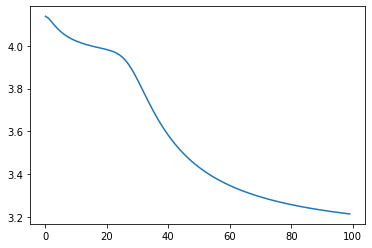

In [13]:
print('Loss versus Epoch plot')
plt.plot(losses)
plt.show()

In [14]:
print('Learned weight and bias(epoch 10)')
print('----------W_H----------')
print(model.W_H)
print('----------W_X----------')
print(model.W_X)
print('----------W_Y----------')
print(model.W_Y)
print('----------b_h----------')
print(model.b_h)
print('----------b_y----------')
print(model.b_y)

Learned weight and bias(epoch 10)
----------W_H----------
[[ 0.50932202 -0.00784417  0.69199169]
 [ 0.85165367  0.21513526  1.0278194 ]
 [ 0.82773446 -0.04777967  0.15304038]]
----------W_X----------
[[ 0.59642522  0.48991375  1.03489729  0.95379447]
 [-0.7827634   1.09530943  0.85136735  0.65522589]
 [ 0.44655709  0.39688764  0.20940656  0.39430302]]
----------W_Y----------
[[-0.03990112 -0.14628696 -0.79365113]
 [ 0.14218846 -1.76612166  0.78341169]
 [ 0.34264126  1.75889412  0.87861401]
 [ 1.04998565  1.87026819  0.46099954]]
----------b_h----------
[-0.10825366 -0.80765547  0.9862762 ]
----------b_y----------
[-0.36777499  1.13880324  0.63198311  0.33640707]


In [19]:
print('Prediction and True value of Y')
print('------Prediction-------')
print(y)
print(np.round(y, 0))
print('---------True----------')
print(y_true)

Prediction and True value of Y
------Prediction-------
[[0.01064884 0.94595399 0.02650433 0.01689284]
 [0.00481235 0.02747222 0.48395868 0.48375676]
 [0.00380065 0.01975769 0.46595152 0.51049014]]
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]
---------True----------
[[0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
